In [1]:
import pandas as pd
import numpy as np

In [2]:
df_londoncrime = pd.read_csv("london_crime_by_lsoa.csv.zip")
df_londoncrime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

## A. Area Plot

Pertanyaan: Wilayah manakah yang memiliki angka kejahatan yang paling besar selama tahun 2008 - 2016

In [4]:
df_LC = df_londoncrime.drop(['lsoa_code','month'], axis=1)
df_LC.head()

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008


In [5]:
df_crime = df_LC.groupby(['borough','year'], axis=0).sum()
df_crime.head()

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990

In [6]:
df_unstack = df_crime.unstack()
df_unstack.head()

value                                                   \
year                   2008   2009   2010   2011   2012   2013   2014   2015   
borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
year                   2016  
borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

In [7]:
top5_crime = df_londoncrime.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
top5_crime = top5_crime.set_index("year").groupby("borough").sum()
top5_crime = top5_crime.sort_values(by="value", ascending=False).head(5)
top5_crime

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


Berdasarkan output diatas, diketahui bahwa Westminster adalah wilayah metropolitan di London dengan angka kejahatan tertinggi.

In [8]:
df_top5 = df_londoncrime.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_top5 = df_top5.loc[top5_crime.index]
df_top5 = pd.pivot_table(df_top5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_top5

borough,Camden,Lambeth,Newham,Southwark,Westminster
year,,,,,
2008,32010,31717,29752,33470,47846
2009,31612,31225,28610,30623,48456
2010,31804,31671,30728,31320,48116
2011,33956,33224,27978,30723,54243
2012,31472,33473,30067,30737,59226
2013,28435,31868,27577,31128,53852
2014,27198,31765,28005,28912,47564
2015,29477,33164,29217,30260,47395
2016,29183,34071,30090,31636,48330


### Visualization:

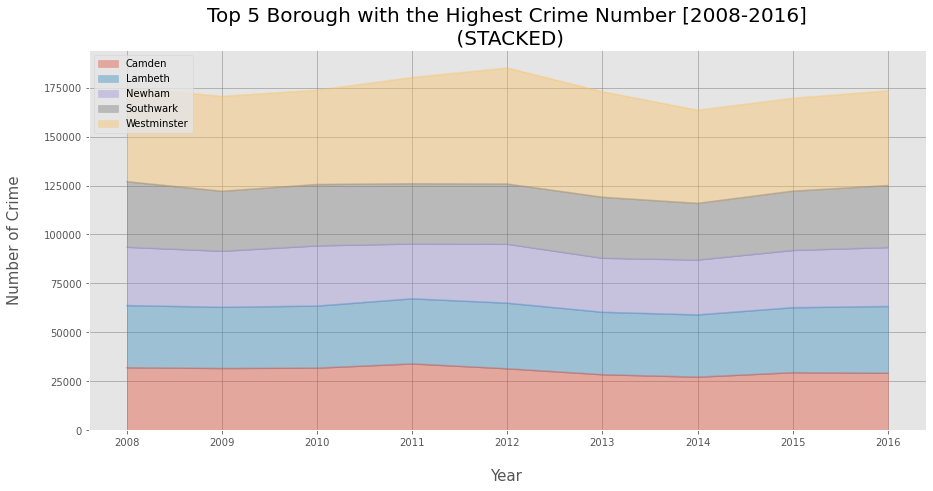

In [9]:
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=True,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n (STACKED)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

### Conclusion:

Berdasarkan plot diatas, dapat diketahui bahwa Westminster memiliki angka kejahatan tertinggi dari tahun 2008 - 2016, diikuti dengan Lambeth, Southwark, Camden dan Newham. Dapat diketahui juga bawha Westminster memiliki angka kejahatan yang sangat tinggi dibandingkan dengan 4 brough lain yaitu pada tahun 2012 diikuti penurunan pada tahun 2013 dan tidak mengalami kenaikan dan penurunan yang signifikan sampai tahun 2016.

## B. Histogram

Pertanyaan: Bagaimana distribusi kasus kriminal di Southwark pada tahun 2008 sampai 2016?

In [10]:
df_unstack.head()

value                                                   \
year                   2008   2009   2010   2011   2012   2013   2014   2015   
borough                                                                        
Barking and Dagenham  17656  17713  17130  16686  15990  15759  15426  16346   
Barnet                23944  23449  23416  24007  23573  22510  22572  24036   
Bexley                15305  14445  13166  11325  11669  11552  11844  11990   
Brent                 23504  24748  25512  27669  26357  23759  24426  24883   
Bromley               24015  21858  19572  19868  19622  18945  19668  20637   

                             
year                   2016  
borough                      
Barking and Dagenham  16741  
Barnet                24684  
Bexley                12840  
Brent                 26693  
Bromley               20164

In [11]:
df_hist = df_unstack.loc[['Southwark']].transpose()
df_hist

borough     Southwark
      year           
value 2008      33470
      2009      30623
      2010      31320
      2011      30723
      2012      30737
      2013      31128
      2014      28912
      2015      30260
      2016      31636

### Visualization:

Text(0.5, 0, 'Number of Crime')

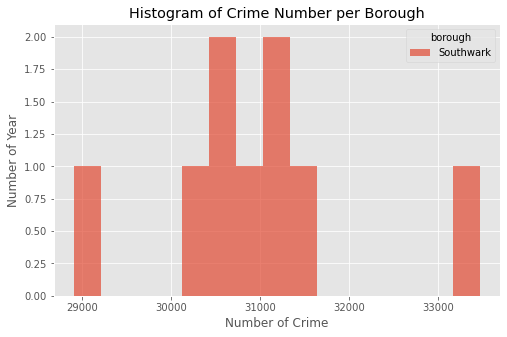

In [12]:
df_hist.plot(kind='hist', 
             figsize=(8,5), 
             bins=15, 
             alpha=0.7)

plt.title('Histogram of Crime Number per Borough')
plt.ylabel('Number of Year')
plt.xlabel('Number of Crime')

### Conclusion: 

Berdasarkan histogram di atas, dapat diketahui bahwa persebaran pada data tersebut cenderung simetris. Serta dapat diketahui pula bahwa terdapat data pencilan yaitu terdapat di antara 28912 - 29368 dan di antara 33014 - 33470.

## C. Bar Chart

Pertanyaan:  Berapa jumlah kejahatan di London tahun 2008-2016?

In [13]:
total_crime = df_londoncrime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


### Visualization:

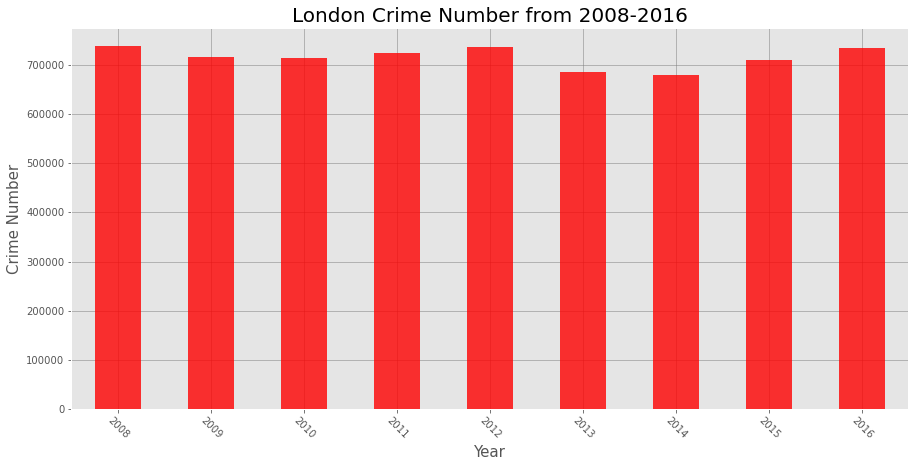

In [14]:
total_crime.plot(kind="bar",
                figsize=(15,7),
                color="red",
                legend=False,
                alpha=0.8)
plt.title("London Crime Number from 2008-2016", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.xticks(rotation=-45)
plt.show()

### Conclusion:

Berdasarkan plot berikut, dapat diketahui bahwa jumlah kejahatan/kriminal di London tahun 2008-2012 adalah lebih dari 700000 dan kemudian turun di tahun 2013 dan 2014, diikuti kenaikan di atas 700000 kasus di tahun 2015

## D. Pie Chart

Pertanyaan: Bagaimana proporsi kategori kejahatan di London tahun 2008-2016?

In [15]:
crime_proporsi = df_londoncrime.drop(["borough","lsoa_code","minor_category","year","month"], axis=1)
crime_proporsi = crime_proporsi.groupby("major_category").size()
crime_proporsi

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

### Visualization:

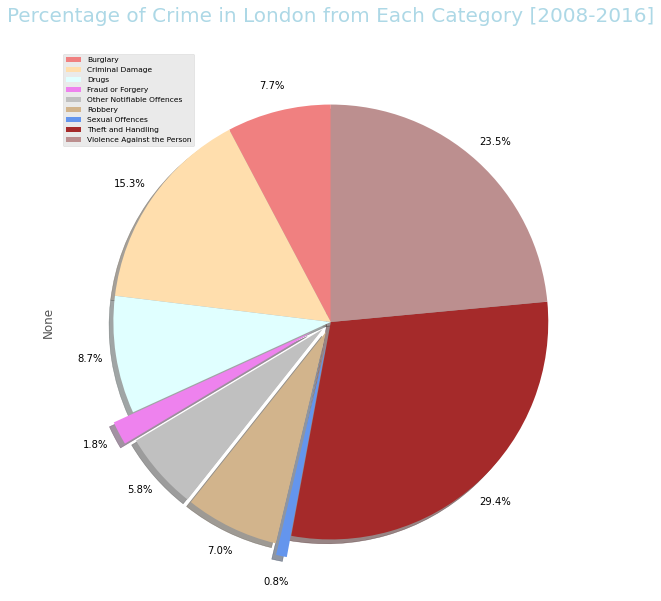

In [16]:
explode_list = [0,0,0,0.1,0.05,0.05,0.1,0,0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
crime_proporsi.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     explode = explode_list,
                     colors=color_list)
plt.title("Percentage of Crime in London from Each Category [2008-2016]\n", fontsize=20, loc="center",color="lightblue")
plt.legend(labels=crime_proporsi.index, loc="upper left", prop={"size":7.5})
plt.show()

### Conclusion:

Berdasarkan visualisasi diatas proporsi kategori kejahatan di London selama tahun 2008-2016 dalam satuan persen. Persentase tertinggi adalah kategori Theft and Handling yaitu sebesar 29.4% dan Violance Against the Person sebesar 23.5%. Sedangkan Sexual Offences dan Fraud or Forgery sebagai kategori dengan jumlah kasus terendah memiliki persentase sebesar 0.8% dan 1.8%.

## E. Box Plot

Pertanyaan: Bagaimana distribusi statistik dari data jumlah kasus kejahatan di London tahun 2008-2016?

In [17]:
total_crime = df_londoncrime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [18]:
# Melihat nilai statistik dari data jumlah kasus kejahatan di London tahun 2008-2016
total_crime.describe()

,value
count,9.000000
mean,716417.555556
std,21301.370555
min,680183.000000
25%,711624.000000
50%,717214.000000
75%,736121.000000
max,738641.000000


### Visualization:

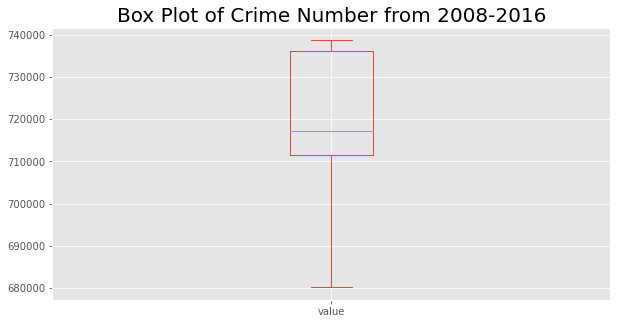

In [19]:
total_crime.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from 2008-2016",fontsize=20)
plt.show()

### Conclusion: 

Berdasarkan plot di atas, diketahui bahwa nilai distribusi data jumlah kasus kejahatan/kriminal di London tidak terdapat outlier atau nilai yang lebih jauh lebih besar/kecil dari data yang lain. Jumlah kasus kejahatan di London tertinggi adalah sekitar 740000, terendah sebesar 680000, dan nilai tengah di sekitar 715000.

## F. Scatter Plot

Pertanyaan: Pada bulan apa jumlah kejahatan di London mencapai angka tertinggi selama tahun 2008-2016?

In [20]:
month_crime = df_londoncrime.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_crime = month_crime.groupby("month").sum()
month_crime = month_crime.reset_index()
month_crime

,month,value
0,1,530247
1,2,500537
2,3,551795
3,4,520648
4,5,552704
5,6,549041
6,7,563076
7,8,532784
8,9,522377
9,10,558252


### Visualization:

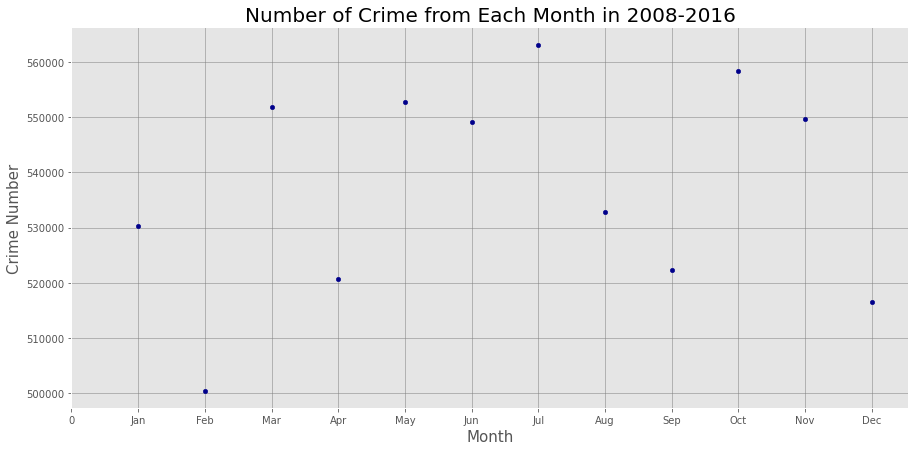

In [21]:
#Memberi nama label bulan
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime.plot(kind="scatter", x="month",y="value",figsize=(15,7), color="darkblue")
plt.title("Number of Crime from Each Month in 2008-2016", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

### Conclusion: 

Bulan yang sama selama tahun 2008-2016 dijumlahkan dan dihasilkan angka kasus kejahatan di London yang paling tinggi adalah bulan Juli dan yang paling rendah adalah bulan Februari.

## G. Word Clouds

In [25]:
!pip install wordcloud
print ('WordCloud is installed and imported!')

# maaf kak belum bisa

Defaulting to user installation because normal site-packages is not writeable
WordCloud is installed and imported!


## H. Folium Maps